# Analysis of the Madden-Julian Oscillation

- Repo url `https://github.com/dg227/NLSA`

- Data directory `/NLSA/pubs/LintnerEtAl23_GRL/data/raw
/LGPS23/`

In [2]:
import scipy.io 

In [3]:
rmm_data = scipy.io.loadmat('RMM_data.mat')

In [7]:
x = rmm_data['RMM']

In [8]:
x.shape

(432, 8034)

In [10]:
432/3 # number of longitude points

144.0

In [12]:
from scipy.sparse.linalg import svds

In [74]:
u, s, v = svds(x, k=10)

In [27]:
v.shape

(10, 8034)

In [18]:
import numpy as np

In [75]:
idx = np.argsort(s)

In [21]:
idx = idx[::-1]

In [76]:
s = s[idx]
u = u[:, idx]
v = v[idx, :]

In [36]:
v.shape

(10, 8034)

In [77]:
RMM1 = v[0, :]
RMM2 = v[1, :]

In [39]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'RMM indices')

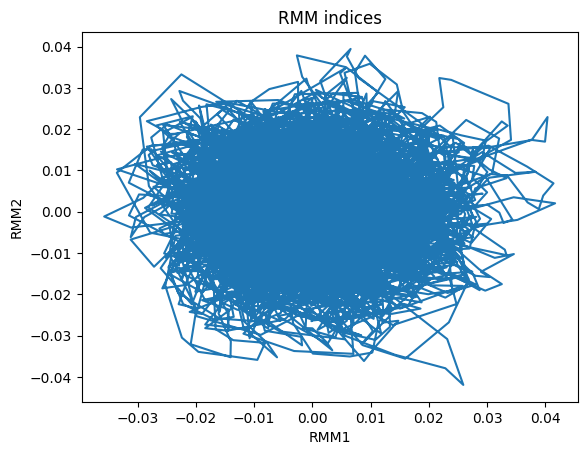

In [78]:
fig, ax = plt.subplots(num=1)
ax.plot(RMM1, RMM2)
ax.set_xlabel('RMM1')
ax.set_ylabel('RMM2')
ax.set_title('RMM indices')

In [41]:
from numpy.lib.stride_tricks import sliding_window_view

In [67]:
y = sliding_window_view(x, 64, 1)
y = np.moveaxis(y, 2, 0).reshape(432 * 64, 7971)

In [58]:
y.shape

(27648, 7971)

In [48]:
64 * 432

27648

In [49]:
x.shape

(432, 8034)

In [50]:
8034 - 63

7971

In [59]:
def delay_embedding(dataset, n_delays=None, delay_length=None):
    m = dataset.shape[1]
    d = dataset.shape[0]

    #column shift from first to final embedding layer
    max_shift = n_delays*delay_length

    #creating time embedding matrix
    dataset_emb = np.zeros((((n_delays+1)*d), m-(max_shift)))

    #loading in first layer
    dataset_emb[-d:, :] = dataset[:, (max_shift):]

    for i in range(0, n_delays):
        #column shift from first to current embedding layer
        current_shift = (i) * delay_length
        #loading next embedding layer into embedded data matrix
        dataset_emb[d*(i):d*(i+1), :] = dataset[:, (current_shift):(current_shift-max_shift)]
    return dataset_emb

In [62]:
y = delay_embedding(x, n_delays=63, delay_length=1)

In [63]:
y.shape

(27648, 7971)

In [71]:
[u2, s2, v2] = svds(y)

idx2 = np.argsort(s2)
#idx2 = idx2[::-1]
s2 = s2[idx2]
u2 = u2[:, idx2]
v2 = v2[idx2, :]

In [72]:
RMM1_delay = v2[0, :]
RMM2_delay = v2[1, :]

Text(0.5, 1.0, 'RMM indices with delays')

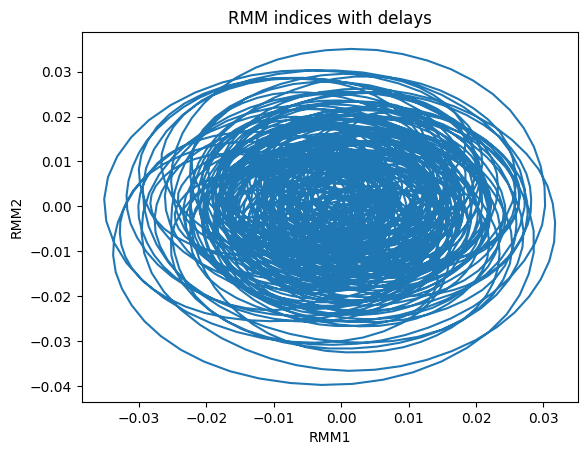

In [73]:
fig, ax = plt.subplots(num=1)
ax.plot(RMM1_delay, RMM2_delay)
ax.set_xlabel('RMM1')
ax.set_ylabel('RMM2')
ax.set_title('RMM indices with delays')